In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 1000)

Since the data was only avaiable in german we provide a translation table so that you can also understand what the original names were  

Translation table:  

# general translations
Bundesland = state

# features
#### general
Wahlkreis-Nr. = constituency number  
Wahlkreis-Name = constituency name 
Gemeinden am 31.12.2015 (Anzahl) = municipalities  
Fläche am 31.12.2015 (km^2) = area in km^2  

##### (The results table)  
Gebiet = area name  
gehört zu = belongs to  
Wahlberechtigte = eligible voters  
Wähler = voters  
Ungültige = invalid votes  
gültige = valid votes  


##### parties
Christlich Demokratische Union Deutschlands = cdu  
Sozialdemokratische Partei Deutschlands = spd  
Die Linke = linke  
BÜNDNIS 90/DIE GRÜNEN = green  
Freie Demokratische Partei = fdp  
Alternative für Deutschland = afd  

#### population  
Bevölkerung am 31.12.2015 - Insgesamt (in 1000) = population - total (in thousands)  
Bevölkerung am 31.12.2015 - Deutsche (in 1000) = population - germans (in thousands)  
Bevölkerung am 31.12.2015 - Ausländer (%) = population - foreigners (%)  
Bevölkerungsdichte am 31.12.2015 (Einwohner je km^2) = population density (inhabitants per km^2)  
Zu- (+) bzw. Abnahme (-) der Bevölkerung 2015 - Geburtensaldo (je 1000 Einwohner) = increase or decrease in population due to birth/death (per 1000 inhabitants)   
Zu- (+) bzw. Abnahme (-) der Bevölkerung 2015 - Wanderungssaldo (je 1000 Einwohner) =  increase or decrease in population due to migration (per 1000 inhabitants)

#### age
Alter von ... bis ... Jahren am 31.12.2015 - unter 18 (%) = aged under 18 (%)  
Alter von ... bis ... Jahren am 31.12.2015 - 18-24 (%) = aged 18 to 24 (%)  
Alter von ... bis ... Jahren am 31.12.2015 - 25-34 (%) = aged 25 to 34 (%)  
Alter von ... bis ... Jahren am 31.12.2015 - 35-59 (%) = aged 35 to 59 (%)  
Alter von ... bis ... Jahren am 31.12.2015 - 60-74 (%) = aged 60 to 74 (%)  
Alter von ... bis ... Jahren am 31.12.2015 - 75 und mehr (%) = aged 75 an older (%)  

### 2011 data
#### migration
Zensus 2011, Bevölkerung nach Migrationshintergrund am 09.05.2011 - ohne Migrationshintergrund (%) = inhibitants without a migration background (%)  
Zensus 2011, Bevölkerung nach Migrationshintergrund am 09.05.2011 - mit Migrationshintergrund (%) = inhibitants with a migration background (%)  

#### religion
Zensus 2011, Bevölkerung nach Religionszugehörigkeit am 09.05.2011 - Römisch-katholische Kirche (%) = religion - roman catholic (%)  
Zensus 2011, Bevölkerung nach Religionszugehörigkeit am 09.05.2011 - Evangelische Kirche (%) = religion - evangelical (%)  
Zensus 2011, Bevölkerung nach Religionszugehörigkeit am 09.05.2011 - Sonstige, keine, ohne Angabe (%) = religion - other, none, not specified (%)  

#### real estate
Zensus 2011, Wohnungen in Wohngebäuden am 09.05.2011 - Eigentümerquote = real estate ownership rate (%)
Bautätigkeit und Wohnungswesen - Fertiggestellte Wohnungen 2014 (je 1000 Einwohner) = completed apartments in 2014 (per 1000 inhbitants)
Bautätigkeit und Wohnungswesen - Bestand an Wohnungen am 31.12.2015 (je 1000 Einwohner) = Stock of apartments (per 1000 inhabitants)

#### income
Verfügbares Einkommen der privaten Haushalte 2014 (€ je Einwohner) = available income for private household € (per inhabitant)  
Bruttoinlandsprodukt 2014 (€ je Einwohner) = gdp per capita in €  

#### vehicles
Kraftfahrzeugbestand am 01.01.2016 (je 1000 Einwohner) = Motor vehicles (per 1000 inhabitants)  

#### education
Absolventen/Abgänger beruflicher Schulen 2015 = graduates of vocational schools  
Absolventen/Abgänger allgemeinbildender Schulen 2015 - insgesamt ohne Externe (je 1000 Einwohner) = graduates of general schools (per 1000 inhabitants)  
Absolventen/Abgänger allgemeinbildender Schulen 2015 - ohne Hauptschulabschluss (%) = graduates of general schools - without hauptschulabschluss (%)  
Absolventen/Abgïänger allgemeinbildender Schulen 2015 - mit Hauptschulabschluss (%) = graduates of general schools - with hauptschulabschluss (%)  
Absolventen/Abgänger allgemeinbildender Schulen 2015 - mit mittlerem Schulabschluss (%) = graduates of general schools - with mittlerem Schulabschluss (%)  
Absolventen/Abgänger allgemeinbildender Schulen 2015 - mit allgemeiner und Fachhochschulreife (%) = graduates of general schools - with allgemeiner and Fachhochschulereife (%)  

#### child care
Kindertagesbetreuung: Betreute Kinder am 01.03.2016 (je 1000 Einwohner) = children cared for (per 1000 inhabitants)  

#### economical
Unternehmensregister 2014 - Unternehmen insgesamt (je 1000 Einwohner) = companies registered (per 1000 inhabitants)  
Unternehmensregister 2014 - Handwerksunternehmen (je 1000 Einwohner) = handicraft companies registered (per 1000 inhabitants)  
Sozialversicherungspflichtig Beschäftigte am 30.06.2016 - insgesamt (je 1000 Einwohner) = employed and required to pay social secruity (per 1000 inhabitants)  
Sozialversicherungspflichtig Beschäftigte am 30.06.2016 - Land- und Forstwirtschaft, Fischerei (%) = employed and required to pay social secruity in - agriculture, forestry and fishing (%)  
Sozialversicherungspflichtig Beschäftigte am 30.06.2016 - Produzierendes Gewerbe (%) = employed and required to pay social secruity in - manufacturing (%)  
Sozialversicherungspflichtig Beschäftigte am 30.06.2016 - Handel, Gastgewerbe, Verkehr (%) = employed and required to pay social secruity in - trade, hospitality, transport (%)  
Sozialversicherungspflichtig Beschäftigte am 30.06.2016 - öffentliche und private Dienstleister (%) = employed and required to pay social secruity in - public and private service providers (%)  
Sozialversicherungspflichtig Beschäftigte am 30.06.2016 - übrige Dienstleister und 'ohne Angabe' (%) = employed and required to pay social secruity in - other service providers or not specified (%)  

#### unemployment
Empfänger(innen) von Leistungen nach SGB II am 31.12.2016 -  insgesamt (je 1000 Einwohner) = receivers of social spending (per 1000 inhabitants)  

Empfänger(innen) von Leistungen nach SGB II am 31.12.2016 - nicht erwerbsfähige Hilfebedürftige (%) = receivers of social spending - unable to work (%)  
Empfänger(innen) von Leistungen nach SGB II am 31.12.2016 - Ausländer (%) = receivers of social spending - foreigners (%)  
Arbeitslosenquote März 2017 - insgesamt = unemployment rate (%)  
Arbeitslosenquote März 2017 - Männer = unemployment rate - male (%)  
Arbeitslosenquote März 2017 - Frauen = unemployment rate - female (%)  
Arbeitslosenquote März 2017 - 15 bis unter 20 Jahre = unemployment rate - 15 to under 20 year olds (%)  
Arbeitslosenquote März 2017 - 55 bis unter 65 Jahre = unemployment rate - 55 to under 65 year olds (%)  

In [2]:
results = pd.read_csv("results_transformed.csv", sep=";", decimal=',')

# all partys
parties = list(results.columns[7:])
parties

['cdu', 'spd', 'linke', 'green', 'fdp', 'afd']

In [3]:
# import features with , as decimal
features = pd.read_csv("features_transformed.csv", sep=";", decimal=',')

In [4]:
# for some reason decimal = "," doesnt get rid of all commas in the excel file so we need to transform the rest
col2replace = list(features.select_dtypes(exclude=['float64', 'int64']).columns)
# state is non numerical so does not need to be transformed from european , to us . notation
col2replace.remove('state')
# some NAN valued are in the table (indicated by a . with no value so we put nan there)
features[col2replace] = features[col2replace].replace(".", np.nan)
# replace all , by dot
features[col2replace] = features[col2replace].apply(lambda x: pd.to_numeric(x.str.replace(",",".")))

In [5]:
# this should return 0 indicating that all commas have been transformed to dots in order to get them to numerical data types
features[features.eq(",").any(1)]

,state,constituency number,municipalities,area in km^2,population - total (in thousands),population - germans (in thousands),population - foreigners (%),population density (inhabitants per km^2),increase or decrease in population due to birth/death (per 1000 inhabitants),increase or decrease in population due to migration (per 1000 inhabitants),...,employed and required to pay social secruity in - public and private service providers (%),employed and required to pay social secruity in - other service providers or not specified (%),receivers of social spending (per 1000 inhabitants),receivers of social spending - unable to work (%),receivers of social spending - foreigners (%),unemployment rate (%),unemployment rate - male (%),unemployment rate - female (%),unemployment rate - 15 to under 20 year olds (%),unemployment rate - 55 to under 65 year olds (%)


In [6]:
# merge the results data with the feature data using merge
df_all = results.merge(features, left_on='constituency number',right_on='constituency number')
df_all

,constituency number,area name,belongs to,eligible voters,voters,invalid votes,valid votes,cdu,spd,linke,...,employed and required to pay social secruity in - public and private service providers (%),employed and required to pay social secruity in - other service providers or not specified (%),receivers of social spending (per 1000 inhabitants),receivers of social spending - unable to work (%),receivers of social spending - foreigners (%),unemployment rate (%),unemployment rate - male (%),unemployment rate - female (%),unemployment rate - 15 to under 20 year olds (%),unemployment rate - 55 to under 65 year olds (%)
0,1,Flensburg – Schleswig,1.0,228471,171914,1449,170465,58320,40388,14002,...,16.4,35.2,88.5,26.3,18.8,7.2,8.2,6.2,4.2,7.3
1,2,Nordfriesland – Dithmarschen Nord,1.0,186568,139194,1123,138071,52928,31120,8589,...,12.4,31.7,70.9,26.2,16.7,7.2,7.7,6.6,3.6,8.4
2,3,Steinburg – Dithmarschen Süd,1.0,176636,132017,1139,130878,47366,29756,8732,...,15.9,30.3,80.1,26.0,21.1,6.6,7.2,6.0,5.2,6.6
3,4,Rendsburg-Eckernförde,1.0,200831,157354,1087,156267,56585,35766,9962,...,15.5,34.7,59.4,28.1,23.8,5.1,5.5,4.7,3.2,5.6
4,5,Kiel,1.0,204650,153273,1204,152069,40736,36208,15546,...,25.2,38.6,138.7,26.4,28.3,8.8,10.0,7.6,6.1,8.7
5,6,Plön – Neumünster,1.0,174937,131713,1199,130514,43778,31013,8503,...,17.6,29.1,86.8,26.2,22.1,6.9,7.5,6.4,4.4,7.7
6,7,Pinneberg,1.0,238533,187715,1343,186372,63863,42729,13111,...,17.2,22.0,67.7,28.8,34.6,5.2,5.6,4.8,3.3,6.4
7,8,Segeberg – Stormarn-Mitte,1.0,247296,193280,1335,191945,66367,43027,13237,...,17.5,24.3,54.5,28.5,28.3,4.6,4.9,4.2,2.7,5.1
8,9,Ostholstein – Stormarn-Nord,1.0,181522,138439,1144,137295,48898,33764,8303,...,12.3,33.4,62.6,24.9,20.2,6.2,6.6,5.7,3.7,7.4
9,10,Herzogtum Lauenburg – Stormarn-Süd,1.0,244930,193334,1363,191971,66031,42815,12480,...,15.5,26.5,59.5,27.8,28.7,4.8,5.1,4.5,3.2,5.5


In [7]:
# Checking if all columns are there
# -1 because constituency number is in both -> will only be included once
df_all.shape[1] == features.shape[1] + results.shape[1] - 1

True

In [8]:
vote_type = ["eligible voters", "voters", "invalid votes", "valid votes"]
df_all.loc[:, vote_type]


,eligible voters,voters,invalid votes,valid votes
0,228471,171914,1449,170465
1,186568,139194,1123,138071
2,176636,132017,1139,130878
3,200831,157354,1087,156267
4,204650,153273,1204,152069
5,174937,131713,1199,130514
6,238533,187715,1343,186372
7,247296,193280,1335,191945
8,181522,138439,1144,137295
9,244930,193334,1363,191971


In [9]:
germany = df_all[df_all["constituency number"] == 999]
germany

,constituency number,area name,belongs to,eligible voters,voters,invalid votes,valid votes,cdu,spd,linke,...,employed and required to pay social secruity in - public and private service providers (%),employed and required to pay social secruity in - other service providers or not specified (%),receivers of social spending (per 1000 inhabitants),receivers of social spending - unable to work (%),receivers of social spending - foreigners (%),unemployment rate (%),unemployment rate - male (%),unemployment rate - female (%),unemployment rate - 15 to under 20 year olds (%),unemployment rate - 55 to under 65 year olds (%)
315,999,Bundesgebiet,NaN,61688485,46976341,460849,46515492,15317344,9539381,4297270,...,20.8,27.5,76.0,26.4,29.8,6.0,6.4,5.6,3.6,6.7


In [10]:
# get voters as a percentage of all people in that area that were eligible to vote
df_all["voters %"] = df_all["voters"] / df_all["eligible voters"].astype(float) * 100

# get invalid votes as a percentage of the votes casted
df_all["invalid votes %"] = df_all["invalid votes"] / df_all["voters"].astype(float) * 100

# get valid votes as a percentage of votes casted
df_all["valid votes %"] = df_all["valid votes"] / df_all["voters"].astype(float) * 100

# get number of votes for other parties
df_all["other parties"] = df_all["valid votes"] - (df_all.loc[:, ["cdu", "spd", "linke", "fdp", "afd", "green"]].sum(axis=1))
# get percentage of valid votes that went to other parties than the ones who got into parliament
df_all["other parties %"] = df_all["other parties"] / df_all["valid votes"].astype(float) * 100

# get percentages of valid votes that went to each specific party
df_all["cdu %"] = df_all["cdu"] / df_all["valid votes"].astype(float) * 100
df_all["spd %"] = df_all["spd"] / df_all["valid votes"].astype(float) * 100
df_all["linke %"] = df_all["linke"] / df_all["valid votes"].astype(float) * 100
df_all["fdp %"] = df_all["fdp"] / df_all["valid votes"].astype(float) * 100
df_all["afd %"] = df_all["afd"] / df_all["valid votes"].astype(float) * 100
df_all["green %"] = df_all["green"] / df_all["valid votes"].astype(float) * 100

In [11]:
# so to check if all votes were distributed correctly as a percentages we check if everything adds to 100%
df_all.loc[:, ["cdu %", "spd %", "linke %", "fdp %", "afd %", "green %", "other parties %"]].sum(axis=1)

0      100.0
1      100.0
2      100.0
3      100.0
4      100.0
5      100.0
6      100.0
7      100.0
8      100.0
9      100.0
10     100.0
11     100.0
12     100.0
13     100.0
14     100.0
15     100.0
16     100.0
17     100.0
18     100.0
19     100.0
20     100.0
21     100.0
22     100.0
23     100.0
24     100.0
25     100.0
26     100.0
27     100.0
28     100.0
29     100.0
30     100.0
31     100.0
32     100.0
33     100.0
34     100.0
35     100.0
36     100.0
37     100.0
38     100.0
39     100.0
40     100.0
41     100.0
42     100.0
43     100.0
44     100.0
45     100.0
46     100.0
47     100.0
48     100.0
49     100.0
50     100.0
51     100.0
52     100.0
53     100.0
54     100.0
55     100.0
56     100.0
57     100.0
58     100.0
59     100.0
60     100.0
61     100.0
62     100.0
63     100.0
64     100.0
65     100.0
66     100.0
67     100.0
68     100.0
69     100.0
70     100.0
71     100.0
72     100.0
73     100.0
74     100.0
75     100.0
76     100.0

In [12]:
df_all

,constituency number,area name,belongs to,eligible voters,voters,invalid votes,valid votes,cdu,spd,linke,...,invalid votes %,valid votes %,other parties,other parties %,cdu %,spd %,linke %,fdp %,afd %,green %
0,1,Flensburg – Schleswig,1.0,228471,171914,1449,170465,58320,40388,14002,...,0.842863,99.157137,4843,2.841052,34.212302,23.692840,8.214003,11.119585,6.836007,13.084211
1,2,Nordfriesland – Dithmarschen Nord,1.0,186568,139194,1123,138071,52928,31120,8589,...,0.806788,99.193212,3210,2.324891,38.333901,22.539128,6.220713,13.072984,6.540113,10.968270
2,3,Steinburg – Dithmarschen Süd,1.0,176636,132017,1139,130878,47366,29756,8732,...,0.862768,99.137232,3586,2.739956,36.190956,22.735678,6.671862,13.216889,8.542307,9.902352
3,4,Rendsburg-Eckernförde,1.0,200831,157354,1087,156267,56585,35766,9962,...,0.690799,99.309201,3968,2.539244,36.210460,22.887750,6.374986,12.204112,7.409114,12.374334
4,5,Kiel,1.0,204650,153273,1204,152069,40736,36208,15546,...,0.785526,99.214474,5128,3.372153,26.787840,23.810244,10.222991,11.707843,6.907391,17.191538
5,6,Plön – Neumünster,1.0,174937,131713,1199,130514,43778,31013,8503,...,0.910313,99.089687,3228,2.473298,33.542762,23.762202,6.515010,12.627764,8.551573,12.527392
6,7,Pinneberg,1.0,238533,187715,1343,186372,63863,42729,13111,...,0.715446,99.284554,4621,2.479450,34.266413,22.926727,7.034855,13.271843,8.572640,11.448072
7,8,Segeberg – Stormarn-Mitte,1.0,247296,193280,1335,191945,66367,43027,13237,...,0.690708,99.309292,5095,2.654406,34.576050,22.416317,6.896246,13.567949,8.943187,10.945844
8,9,Ostholstein – Stormarn-Nord,1.0,181522,138439,1144,137295,48898,33764,8303,...,0.826357,99.173643,2908,2.118067,35.615281,24.592301,6.047562,13.217524,8.581522,9.827743
9,10,Herzogtum Lauenburg – Stormarn-Süd,1.0,244930,193334,1363,191971,66031,42815,12480,...,0.704998,99.295002,4864,2.533716,34.396341,22.302848,6.500982,13.628621,9.788979,10.848514


In [13]:
# seperate areas, states and germany as whole to each own dataframe
# get all areas
areas = df_all[df_all["constituency number"] < 900]

# get all states
states = df_all[np.logical_and(df_all["constituency number"] > 900, df_all["constituency number"] < 999)]

# get germany as a whole
germany = df_all[df_all["constituency number"] == 999]

In [14]:
parties_percentages = ["cdu %", "spd %", "linke %", "fdp %", "afd %", "green %", "other parties %"]

<AxesSubplot:>

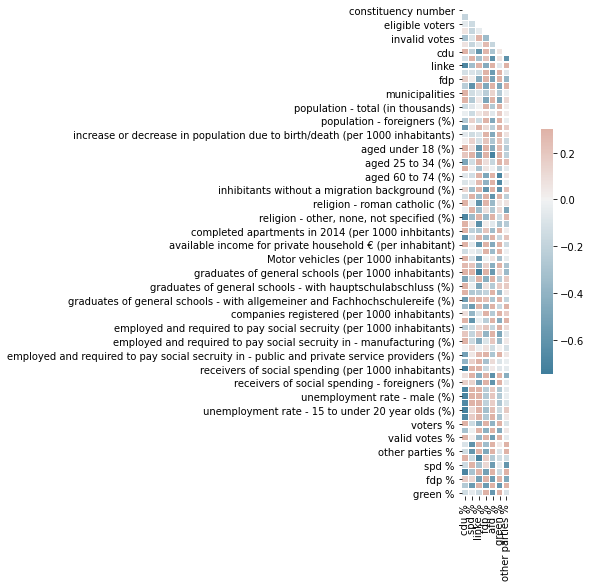

In [15]:
# Compute the correlation matrix
corr = areas.corr()
corr = corr[parties_percentages]

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
corr[parties_percentages]

,cdu %,spd %,linke %,fdp %,afd %,green %,other parties %
constituency number,0.295422,-0.394606,-0.325510,0.147859,0.096239,0.204707,0.319919
belongs to,-0.188017,-0.722741,0.604628,-0.472003,0.766416,-0.319800,0.637407
eligible voters,-0.057628,-0.151771,0.119072,0.093905,-0.029111,0.143066,0.035073
voters,0.056857,-0.182523,-0.045858,0.248224,-0.161647,0.311618,0.002952
invalid votes,-0.298313,-0.086242,0.390555,-0.349813,0.505232,-0.365496,0.036954
valid votes,0.064283,-0.180568,-0.055553,0.257107,-0.174287,0.320949,0.002042
cdu,0.820981,-0.200099,-0.591466,0.280101,-0.294788,0.058502,-0.103433
spd,-0.098394,0.902886,-0.320885,0.222923,-0.619983,0.076737,-0.608752
linke,-0.680208,-0.333405,0.965054,-0.453641,0.435073,-0.059602,0.340621
green,-0.118686,-0.098298,-0.136944,0.472016,-0.546517,0.965658,-0.070749


In [17]:
# the correlation shape should be 60 because state and area name area name are both strings (no correlation can be calcuated)
corr.shape

(71, 7)

In [18]:
areas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 313
Data columns (total 73 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   constituency number                                                                             299 non-null    int64  
 1   area name                                                                                       299 non-null    object 
 2   belongs to                                                                                      299 non-null    float64
 3   eligible voters                                                                                 299 non-null    int64  
 4   voters                                                                                          299 non-null    int64  
 5   invalid votes  

In [19]:
X = areas.copy()
X = X.drop(columns=['constituency number', 'belongs to', "eligible voters", "voters", "invalid votes", \
                    "valid votes", "cdu", "spd", "linke", "green", "fdp", "afd", \
                    "voters %", "invalid votes %", "valid votes %", "cdu %", "spd %", "linke %", "fdp %", \
                    "afd %", "green %", "other parties", "other parties %", "area name", "state"])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 313
Data columns (total 48 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   municipalities                                                                                  299 non-null    int64  
 1   area in km^2                                                                                    299 non-null    float64
 2   population - total (in thousands)                                                               299 non-null    float64
 3   population - germans (in thousands)                                                             299 non-null    float64
 4   population - foreigners (%)                                                                     299 non-null    float64
 5   population dens

In [20]:
y = areas[parties_percentages]
y

,cdu %,spd %,linke %,fdp %,afd %,green %,other parties %
0,34.212302,23.692840,8.214003,11.119585,6.836007,13.084211,2.841052
1,38.333901,22.539128,6.220713,13.072984,6.540113,10.968270,2.324891
2,36.190956,22.735678,6.671862,13.216889,8.542307,9.902352,2.739956
3,36.210460,22.887750,6.374986,12.204112,7.409114,12.374334,2.539244
4,26.787840,23.810244,10.222991,11.707843,6.907391,17.191538,3.372153
5,33.542762,23.762202,6.515010,12.627764,8.551573,12.527392,2.473298
6,34.266413,22.926727,7.034855,13.271843,8.572640,11.448072,2.479450
7,34.576050,22.416317,6.896246,13.567949,8.943187,10.945844,2.654406
8,35.615281,24.592301,6.047562,13.217524,8.581522,9.827743,2.118067
9,34.396341,22.302848,6.500982,13.628621,9.788979,10.848514,2.533716


In [21]:
X = X.fillna(0)

In [22]:
import numpy as np
# from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
# X, y = load_linnerud(return_X_y=True)
clf = MultiOutputRegressor(Ridge(random_state=123)).fit(X.values, y.values)
# clf.predict(X[[0]])

In [23]:
clf.predict(X.iloc[0:5,:].values)

array([[33.50441221, 24.80353043,  7.50210551,  9.98571159,  8.68409737,
        12.07086792,  3.44927497],
       [39.99821154, 24.0781448 ,  4.71676948, 12.01856522,  6.47604631,
        10.39849249,  2.31377017],
       [35.09251605, 26.57389308,  6.89376452, 10.25166516,  9.0617758 ,
         8.78315979,  3.3432256 ],
       [36.02349443, 24.87936441,  6.78914299, 10.43865905,  8.61550625,
        10.21650137,  3.03733149],
       [22.59682134, 25.23350072, 14.62261251,  8.99519099,  9.55586961,
        14.75903571,  4.23696912]])

In [24]:
areas.iloc[0:5,:].loc[:, parties_percentages]

,cdu %,spd %,linke %,fdp %,afd %,green %,other parties %
0,34.212302,23.692840,8.214003,11.119585,6.836007,13.084211,2.841052
1,38.333901,22.539128,6.220713,13.072984,6.540113,10.968270,2.324891
2,36.190956,22.735678,6.671862,13.216889,8.542307,9.902352,2.739956
3,36.210460,22.887750,6.374986,12.204112,7.409114,12.374334,2.539244
4,26.787840,23.810244,10.222991,11.707843,6.907391,17.191538,3.372153


## Correlation TOP 10 for each Party

In [241]:
aux = X.join(y)
cor_by_party = aux.corr()[y.columns]

positive_cor_ = {}
negative_cor_ = {}

for party in parties:
    print("\n------------------------------------------------------------------------")
    print("{}".format(party.upper()))
    print("TOP 10: Positive Correlation")
    positive_cor_[party]= cor_by_party[[party + " %"]].drop([party + " %"]).sort_values(by=[party + " %"], ascending=False).head(10)
    display(positive_cor_[party])
    print("TOP 10: Negative Correlation")
    negative_cor_[party] = cor_by_party[[party + " %"]].drop([party + " %"]).sort_values(by=[party + " %"]).head(10)
    display(negative_cor_[party])




------------------------------------------------------------------------
CDU
TOP 10: Positive Correlation


,cdu %
real estate ownership rate (%),0.763916
Motor vehicles (per 1000 inhabitants),0.752640
religion - roman catholic (%),0.660811
employed and required to pay social secruity in - manufacturing (%),0.589688
graduates of general schools (per 1000 inhabitants),0.564496
aged under 18 (%),0.493132
graduates of general schools - with mittlerem Schulabschluss (%),0.484898
graduates of general schools - with hauptschulabschluss (%),0.442886
handicraft companies registered (per 1000 inhabitants),0.430831
available income for private household € (per inhabitant),0.419243


TOP 10: Negative Correlation


,cdu %
receivers of social spending (per 1000 inhabitants),-0.743416
unemployment rate - 15 to under 20 year olds (%),-0.711198
linke %,-0.699691
unemployment rate - male (%),-0.695762
"religion - other, none, not specified (%)",-0.689572
unemployment rate (%),-0.688316
unemployment rate - 55 to under 65 year olds (%),-0.675597
unemployment rate - female (%),-0.669423
Stock of apartments (per 1000 inhabitants),-0.626294
population density (inhabitants per km^2),-0.565066



------------------------------------------------------------------------
SPD
TOP 10: Positive Correlation


,spd %
religion - evangelical (%),0.531682
receivers of social spending - unable to work (%),0.402952
unemployment rate - female (%),0.377646
graduates of general schools (per 1000 inhabitants),0.373002
receivers of social spending (per 1000 inhabitants),0.355295
unemployment rate (%),0.343809
aged 18 to 24 (%),0.340035
inhibitants with a migration background (%),0.324187
unemployment rate - male (%),0.314534
graduates of general schools - with allgemeiner and Fachhochschulereife (%),0.296915


TOP 10: Negative Correlation


,spd %
handicraft companies registered (per 1000 inhabitants),-0.595648
other parties %,-0.592607
afd %,-0.552330
children cared for (per 1000 inhabitants),-0.548300
companies registered (per 1000 inhabitants),-0.377458
"religion - other, none, not specified (%)",-0.350157
inhibitants without a migration background (%),-0.324187
linke %,-0.305429
graduates of general schools - with mittlerem Schulabschluss (%),-0.272317
area in km^2,-0.262140



------------------------------------------------------------------------
LINKE
TOP 10: Positive Correlation


,linke %
"religion - other, none, not specified (%)",0.881506
unemployment rate - 15 to under 20 year olds (%),0.702367
Stock of apartments (per 1000 inhabitants),0.691191
graduates of general schools - without hauptschulabschluss (%),0.681725
children cared for (per 1000 inhabitants),0.660407
unemployment rate - 55 to under 65 year olds (%),0.636240
unemployment rate - male (%),0.595634
receivers of social spending (per 1000 inhabitants),0.575019
unemployment rate (%),0.567015
unemployment rate - female (%),0.521450


TOP 10: Negative Correlation


,linke %
graduates of general schools (per 1000 inhabitants),-0.726102
cdu %,-0.699691
real estate ownership rate (%),-0.624197
religion - roman catholic (%),-0.606756
aged under 18 (%),-0.605386
available income for private household € (per inhabitant),-0.600184
Motor vehicles (per 1000 inhabitants),-0.571014
fdp %,-0.527048
receivers of social spending - foreigners (%),-0.502338
aged 18 to 24 (%),-0.501407



------------------------------------------------------------------------
GREEN
TOP 10: Positive Correlation


,green %
increase or decrease in population due to birth/death (per 1000 inhabitants),0.739102
population - foreigners (%),0.645288
receivers of social spending - foreigners (%),0.623044
inhibitants with a migration background (%),0.604540
aged 25 to 34 (%),0.568046
aged 18 to 24 (%),0.564463
gdp per capita in €,0.556533
companies registered (per 1000 inhabitants),0.545270
employed and required to pay social secruity in - public and private service providers (%),0.536505
employed and required to pay social secruity (per 1000 inhabitants),0.489430


TOP 10: Negative Correlation


,green %
aged 60 to 74 (%),-0.690823
aged 75 an older (%),-0.657452
inhibitants without a migration background (%),-0.604540
afd %,-0.580162
area in km^2,-0.482743
"employed and required to pay social secruity in - agriculture, forestry and fishing (%)",-0.455591
handicraft companies registered (per 1000 inhabitants),-0.435029
graduates of general schools - with mittlerem Schulabschluss (%),-0.363229
Motor vehicles (per 1000 inhabitants),-0.309565
employed and required to pay social secruity in - manufacturing (%),-0.300758



------------------------------------------------------------------------
FDP
TOP 10: Positive Correlation


,fdp %
available income for private household € (per inhabitant),0.641034
inhibitants with a migration background (%),0.600443
receivers of social spending - foreigners (%),0.560022
receivers of social spending - unable to work (%),0.542592
population - foreigners (%),0.492764
green %,0.472734
aged under 18 (%),0.455619
increase or decrease in population due to birth/death (per 1000 inhabitants),0.448181
companies registered (per 1000 inhabitants),0.440661
gdp per capita in €,0.408419


TOP 10: Negative Correlation


,fdp %
inhibitants without a migration background (%),-0.600443
afd %,-0.546332
linke %,-0.527048
area in km^2,-0.486500
aged 60 to 74 (%),-0.480175
other parties %,-0.472462
graduates of general schools - without hauptschulabschluss (%),-0.421825
aged 75 an older (%),-0.394777
children cared for (per 1000 inhabitants),-0.385614
"religion - other, none, not specified (%)",-0.357876



------------------------------------------------------------------------
AFD
TOP 10: Positive Correlation


,afd %
aged 60 to 74 (%),0.649271
children cared for (per 1000 inhabitants),0.636884
aged 75 an older (%),0.605409
inhibitants without a migration background (%),0.592704
"religion - other, none, not specified (%)",0.573747
handicraft companies registered (per 1000 inhabitants),0.562118
other parties %,0.514852
linke %,0.499849
Stock of apartments (per 1000 inhabitants),0.435818
graduates of general schools - without hauptschulabschluss (%),0.422377


TOP 10: Negative Correlation


,afd %
aged 18 to 24 (%),-0.706502
receivers of social spending - unable to work (%),-0.616158
receivers of social spending - foreigners (%),-0.599391
inhibitants with a migration background (%),-0.592704
green %,-0.580162
graduates of general schools (per 1000 inhabitants),-0.568074
spd %,-0.552330
fdp %,-0.546332
population - foreigners (%),-0.464437
increase or decrease in population due to birth/death (per 1000 inhabitants),-0.460601


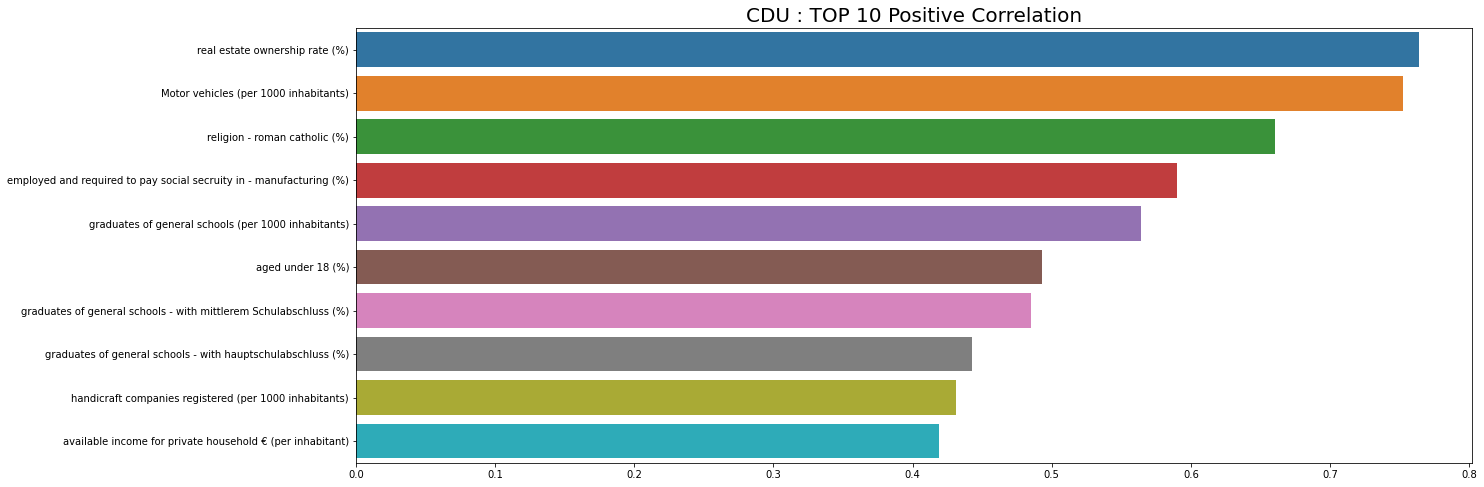

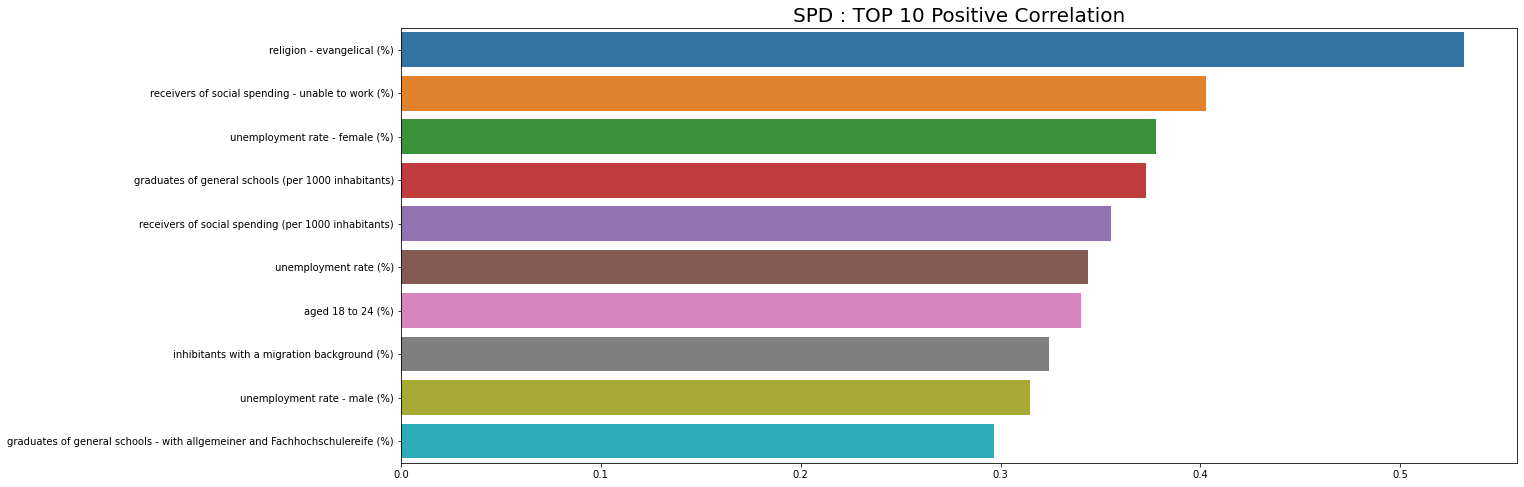

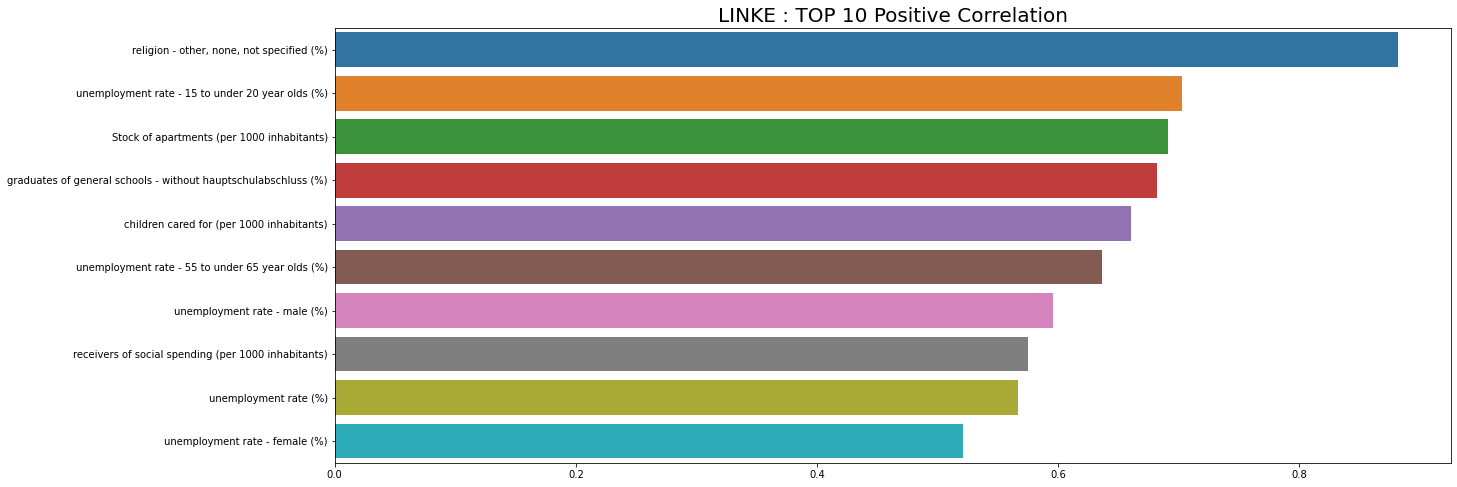

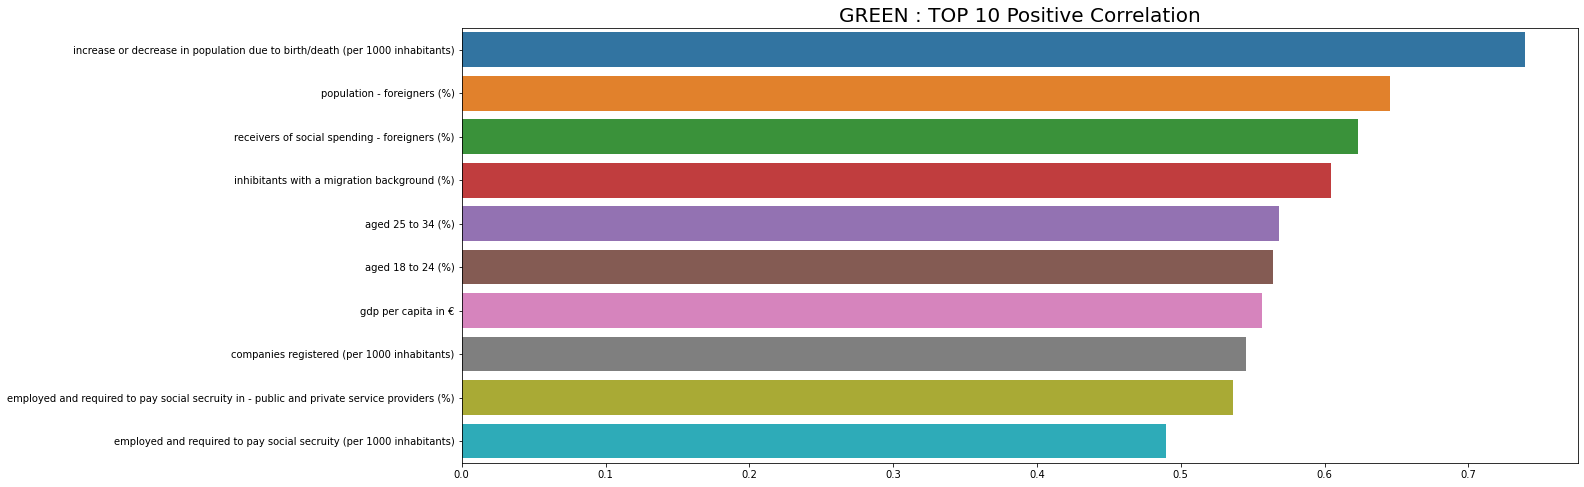

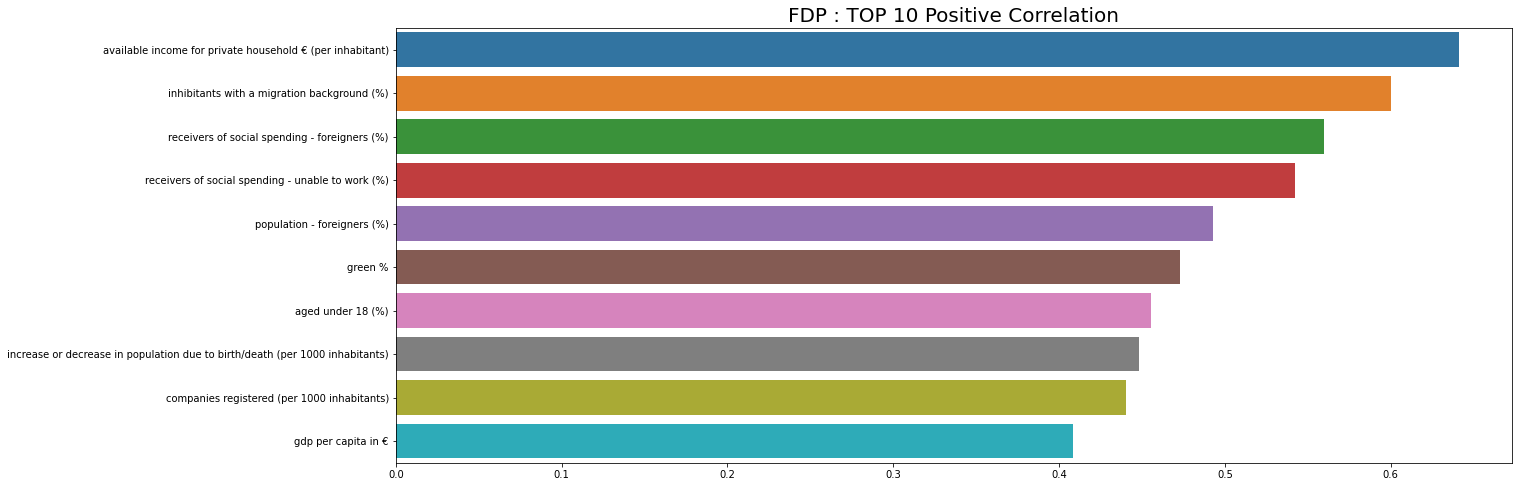

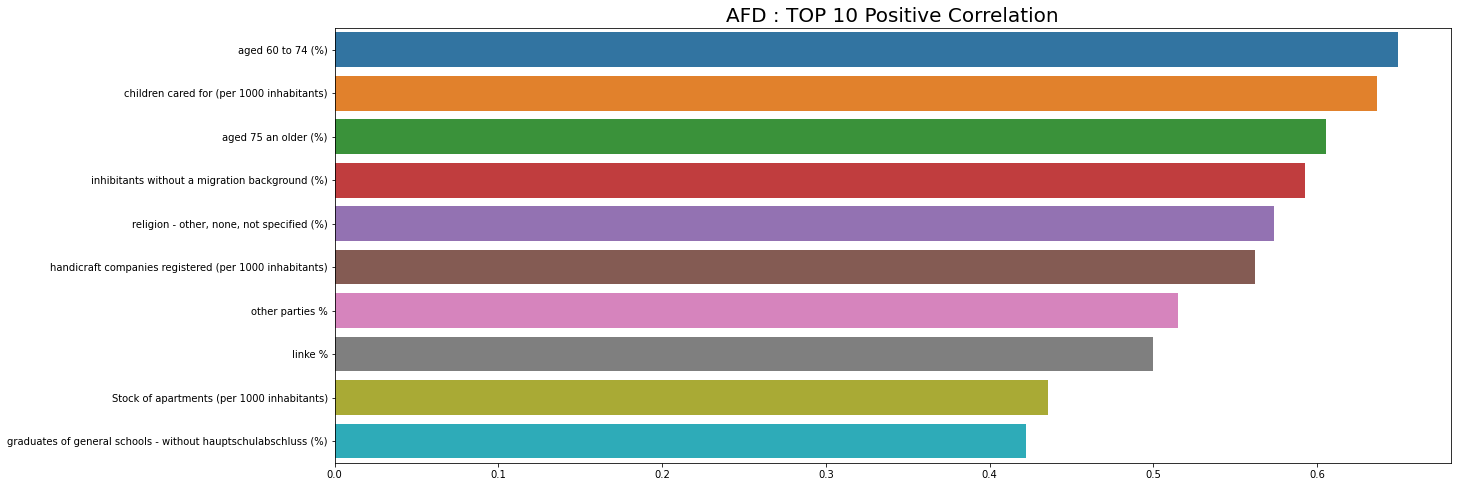

In [242]:
#plt.figure(figsize=[40,40])
#sns.barplot(data=positive_cor_['cdu'].T)
#
for i,party in enumerate(parties):
    #plt.subplot(3, 2, i+1)
    plt.figure(figsize=[20,8])
    plt.title(party.upper() + " : TOP 10 Positive Correlation", size=20)
    plot=sns.barplot(data=positive_cor_[party].T,orient='h')
    plt.savefig("./figures/corr/positive/" + party + '.jpg', dpi=300, bbox_inches='tight')

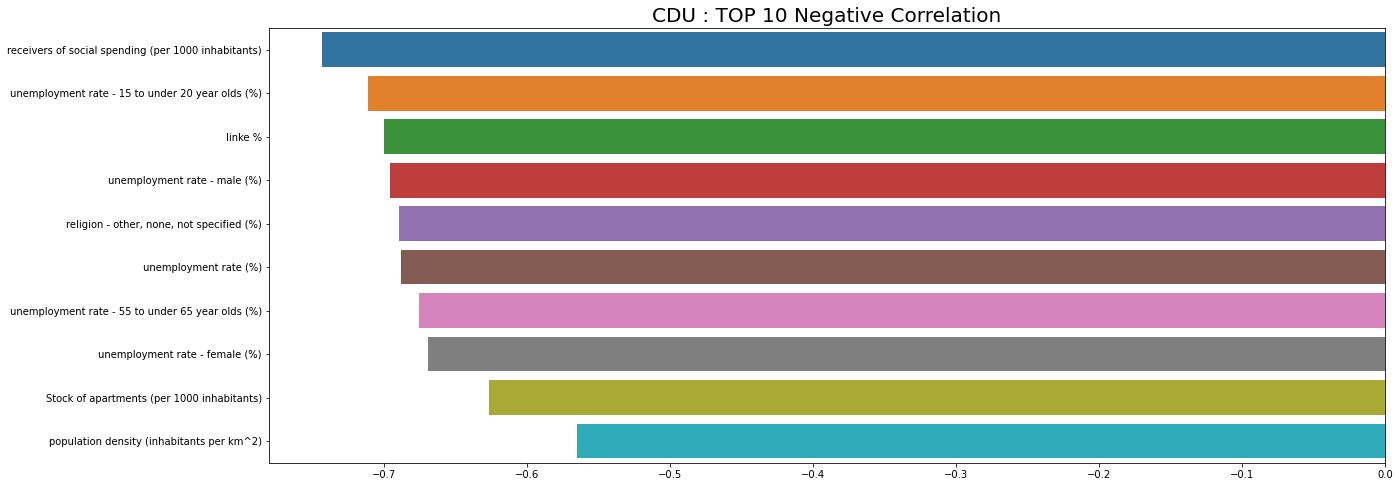

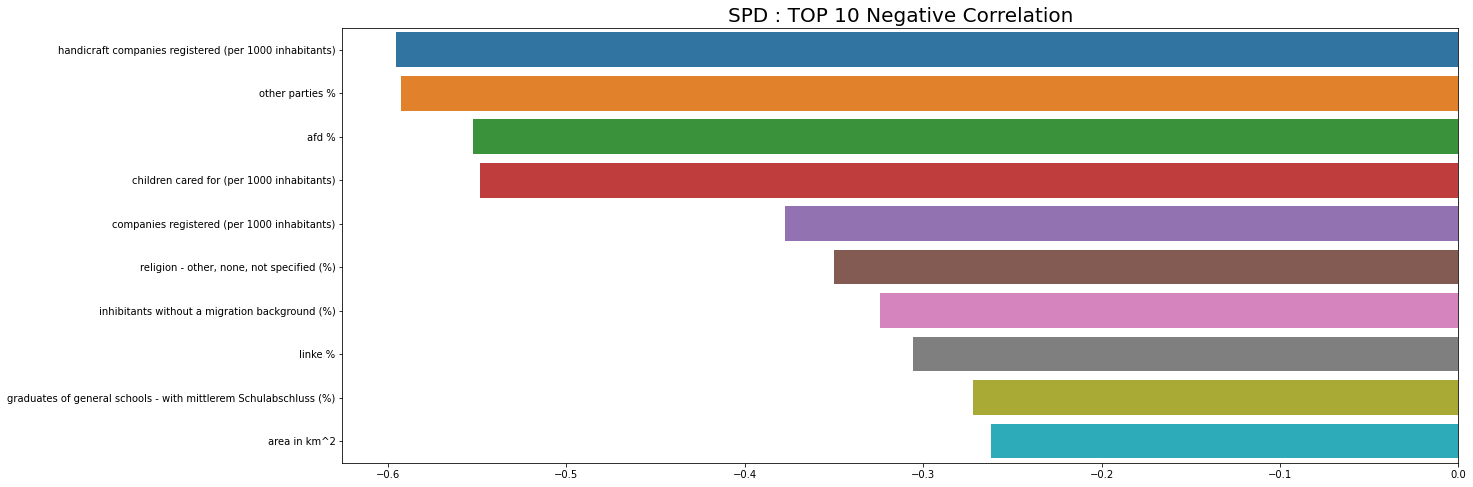

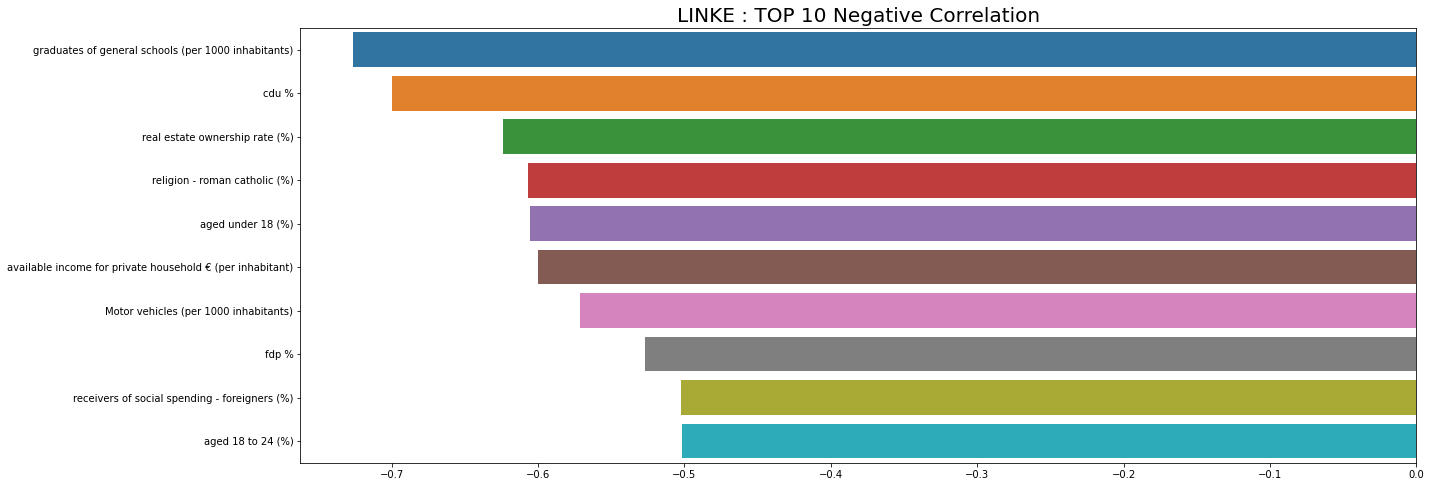

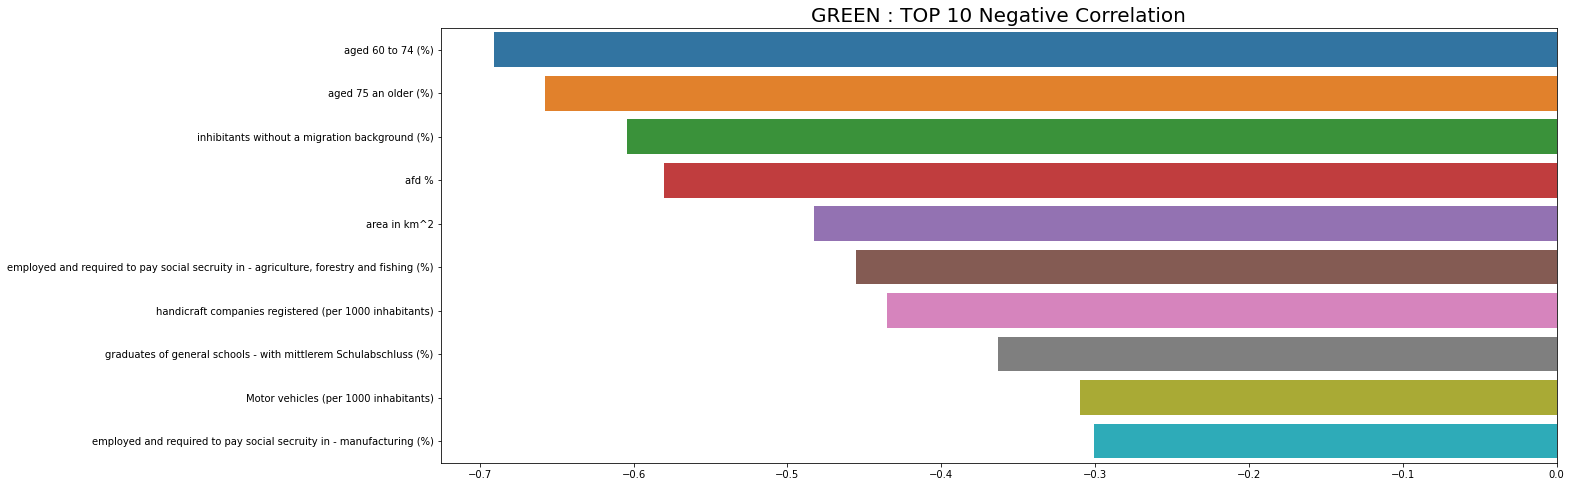

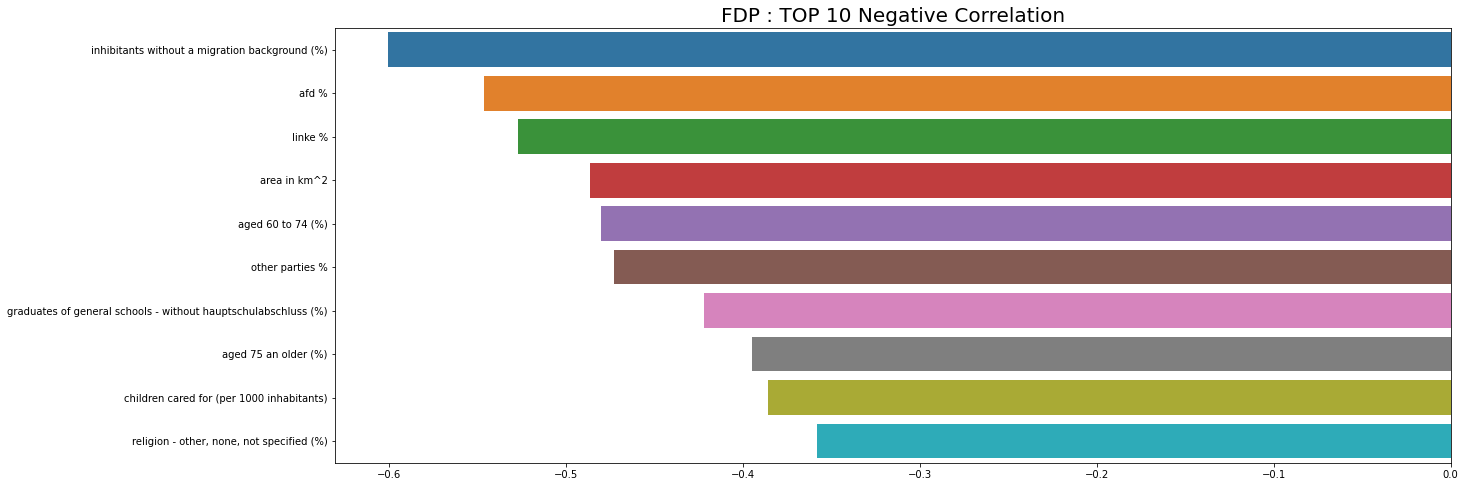

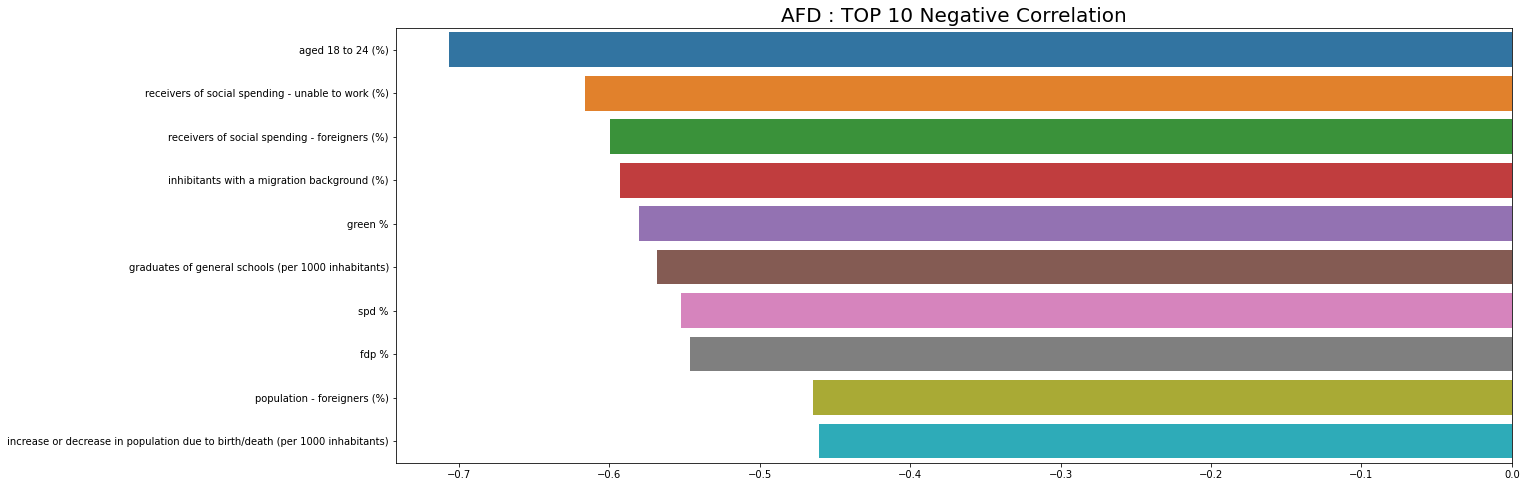

In [243]:

for i,party in enumerate(parties):
    plt.figure(figsize=[20,8])
    plt.title(party.upper() + " : TOP 10 Negative Correlation", size=20)
    plot=sns.barplot(data=negative_cor_[party].T,orient='h')
    plt.savefig("./figures/corr/negative/" + party + '.jpg', dpi=300, bbox_inches='tight')

## Trying Lasso Regression for selecting variables

In [118]:
# t = regression type
# r = range of indizes of features to include
# kwargs = hyperparameters for regression
from sklearn.linear_model import Lasso

def LassoRegression(X_train, y_train, r, **kwargs):
    #
    X = X_train.iloc[:, r].values
    y = y_train
    
    #X_test_adj = X_test.iloc[:, r].values
    
    #if type(r) != range:
        # reshape for 1d array
    #    X = X.reshape(-1, 1)
    #    X_test_adj = X_test_adj.reshape(-1, 1)
    alpha = kwargs.get('alpha',1)
    print(f"ALPHA {alpha}")
    reg = Lasso(alpha=alpha).fit(X, y)
    print(reg)

    coef = pd.DataFrame(reg.coef_, index=list([X_train.columns[r]]))
    #print(f"Model coefficients: \n---- {coef}\n----")
    
    #print(list([X_train.columns[r]]))
    #print(f"Model coefficients: {reg.coef_}")
    #print(f"Model intercept: {reg.intercept_}")
    print(f"Train score: {reg.score(X, y)}")
    #print(f"Test score: {reg.score(X_test_adj, y_test)}")
    return coef

In [132]:
print("-- LASSO WITH THE ALL INPUT VARS --")

for party in parties:
    print("\n------------------------------------------------------------------------")
    print("{}".format(party.upper()))
    coef=LassoRegression(X, y[party + " %"], range(len(X.columns)), alpha=1)
    display(coef[coef.values !=0].sort_values(by=[0], ascending=False))
    #display(cor_by_party[[party + " %"]].sort_values(by=[party + " %"],ascending=False).head(11))

-- LASSO WITH THE ALL INPUT VARS --

------------------------------------------------------------------------
CDU
ALPHA 1
Lasso(alpha=1)
Train score: 0.8260446976737407


,0
graduates of general schools - with mittlerem Schulabschluss (%),0.108219
religion - roman catholic (%),0.093559
companies registered (per 1000 inhabitants),0.060132
real estate ownership rate (%),0.027150
inhibitants without a migration background (%),0.024306
population - germans (in thousands),0.024261
employed and required to pay social secruity (per 1000 inhabitants),0.008020
municipalities,0.004788
area in km^2,0.001429
available income for private household € (per inhabitant),0.000423



------------------------------------------------------------------------
SPD
ALPHA 1
Lasso(alpha=1)
Train score: 0.8017953762485626


,0
graduates of general schools - with allgemeiner and Fachhochschulereife (%),0.181991
religion - evangelical (%),0.124537
receivers of social spending (per 1000 inhabitants),0.087587
"employed and required to pay social secruity in - trade, hospitality, transport (%)",0.063854
real estate ownership rate (%),0.028465
increase or decrease in population due to migration (per 1000 inhabitants),0.017283
population - total (in thousands),0.016587
gdp per capita in €,0.000163
area in km^2,0.000118
available income for private household € (per inhabitant),0.000100



------------------------------------------------------------------------
LINKE
ALPHA 1
Lasso(alpha=1)
Train score: 0.8750553113361611


,0
"religion - other, none, not specified (%)",0.148959
employed and required to pay social secruity (per 1000 inhabitants),0.018992
population - germans (in thousands),0.017104
employed and required to pay social secruity in - other service providers or not specified (%),0.007966
Motor vehicles (per 1000 inhabitants),0.003365
Stock of apartments (per 1000 inhabitants),0.002291
municipalities,0.001105
population density (inhabitants per km^2),0.000704
area in km^2,0.000184
gdp per capita in €,-0.000138



------------------------------------------------------------------------
GREEN
ALPHA 1
Lasso(alpha=1)
Train score: 0.7175835428724782


,0
receivers of social spending - foreigners (%),0.102712
employed and required to pay social secruity in - other service providers or not specified (%),0.075682
religion - evangelical (%),0.055173
employed and required to pay social secruity (per 1000 inhabitants),0.002704
municipalities,0.001162
population density (inhabitants per km^2),0.000791
available income for private household € (per inhabitant),0.000192
area in km^2,0.000026
gdp per capita in €,0.000025
religion - roman catholic (%),-0.001054



------------------------------------------------------------------------
FDP
ALPHA 1
Lasso(alpha=1)
Train score: 0.6046612219714483


,0
population - total (in thousands),0.003857
religion - roman catholic (%),0.002858
receivers of social spending (per 1000 inhabitants),0.001386
available income for private household € (per inhabitant),0.000569
gdp per capita in €,0.000084
population density (inhabitants per km^2),-0.000343
area in km^2,-0.000703
Stock of apartments (per 1000 inhabitants),-0.000946
"religion - other, none, not specified (%)",-0.004179
Motor vehicles (per 1000 inhabitants),-0.004734



------------------------------------------------------------------------
AFD
ALPHA 1
Lasso(alpha=1)
Train score: 0.7528253297757969


,0
"religion - other, none, not specified (%)",0.159614
employed and required to pay social secruity in - manufacturing (%),0.110020
children cared for (per 1000 inhabitants),0.059940
handicraft companies registered (per 1000 inhabitants),0.055123
Stock of apartments (per 1000 inhabitants),0.023645
Motor vehicles (per 1000 inhabitants),0.018945
graduates of general schools - with hauptschulabschluss (%),0.009324
population - total (in thousands),0.002115
employed and required to pay social secruity (per 1000 inhabitants),0.000309
gdp per capita in €,-0.000022
